# Barnyard Animal Image Classification With Fine-Tuned MobileNet

In [1]:
# This solution code was modified from information obtained in a tutorial presented by Mandy @ DeepLizard 

https://youtu.be/qFJeN9V1ZsI

In [2]:
# Import dependencies
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from IPython.display import Image
import itertools

In [3]:
#Loading the previously trained and saved classification model
model = load_model('Models/BarnyardAnimalClassifierFinal.h5')

In [4]:
# Desigante variables for image file folder paths
train_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/train'
valid_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/valid'
test_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/test'

In [5]:
# Pass images through MobileNet specific preprocessing function and place in batches, leaving test_batches unshuffled to preserve label mapping
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size= 30)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size= 30)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size= 30, shuffle=False)

Found 4800 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [6]:
# Run test data through the trained model for predictions 
predictions = model.predict(x=test_batches, verbose=0)

In [7]:
# The confusion matrix will compare true labels to predicted class for each image
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [8]:
# Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Confusion matrix without normalization


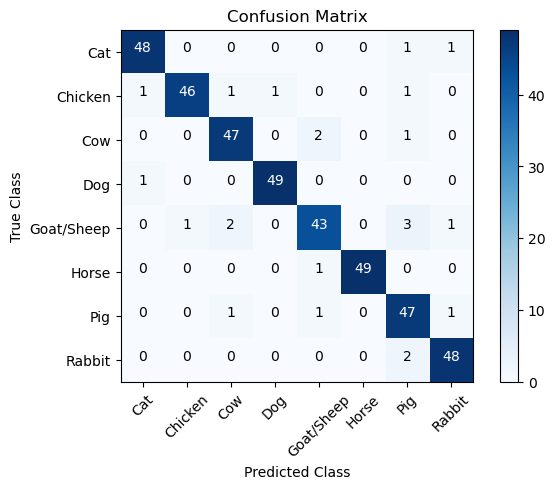

In [9]:
# Plot the confusion matrix with appropriate labels and data
cmlabels = ['Cat', 'Chicken', 'Cow', 'Dog', 'Goat/Sheep', 'Horse', 'Pig', 'Rabbit']
plot_confusion_matrix(cm=cm, classes=cmlabels, title='Confusion Matrix')

In [10]:
# Function to preprocess a single image to MobileNet specifications
def prepare_image(file):
    img_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/verification/'
    img = image.load_img(img_path + file, target_size = (224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

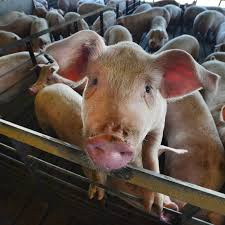

In [13]:
# Displays a single image file
Image(filename='C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/verification/Pig 085.jpg', width=300, height=300)

In [14]:
# makes a prediction on a single image passed to the model
preprocessed_image =prepare_image('Pig 085.jpg')
prediction = model.predict(preprocessed_image)
if np.argmax(prediction) == 0:
    print('This looks like a cat to me.')
elif np.argmax(prediction) == 1:
    print('This looks like a chicken to me.')
elif np.argmax(prediction) == 2:
    print('This looks like a cow to me.')
elif np.argmax(prediction) == 3:
    print('This looks like a dog to me.')
elif np.argmax(prediction) == 4:
    print('This looks like a goat or sheep to me.')
elif np.argmax(prediction) == 5:
    print('This looks like a horse to me.')
elif np.argmax(prediction) == 6:
    print('This looks like a pig to me.')
elif np.argmax(prediction) == 7:
    print('This looks like a rabbit to me.')

1/1 [==============================] - 0s 102ms/step
This looks like a pig to me.
